In [1]:
import warnings # 경고 메시지를 출력하지 않게 하기 위해 improt
warnings.filterwarnings("ignore") # 경고 메시지를 출력하지 않게 한다.
import numpy as np # 수치 계산, 배열 처리를 위해 import 한다.
import pandas as pd # 데이터 분석을 위한 전처리를 위해 import 한다.
import matplotlib as mpl # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지하기 위해 import한다.
mpl.rcParams['axes.unicode_minus'] = False # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지한다.
import matplotlib.pyplot as plt # 시각화를 하기 위해 import한다.
plt.rcParams["font.family"] = "Pretendard" # matplotlib에서 사용할 글꼴을 지정한다.
plt.rcParams["font.size"] = 10 # matplotlib에서 사용할 글꼴 크기를 지정한다.
import seaborn as sns # 시각화를 하기 위해 import한다. matplotlib 기반으로 만든 시각화 도구
from plotnine import * # R의 ggplot2 패키지를 사용하는 것처럼 만드는 시각화 도구를 import한다.
import missingno as msno # 누락값의 분포를 그래프 형태로 표현한다.
import folium
from mpl_toolkits.mplot3d import Axes3D # 3d 모듈

In [2]:
seoul_metro = pd.read_csv('./data/seoul_metro.csv', encoding='cp949')
seoul_metro

,철도운영기관명,선명,역명,지번주소,도로명주소
0,서울교통공사,1호선,동대문,서울특별시 종로구 창신동 492-1 동대문역(1호선),서울특별시 종로구 종로 지하302(창신동)
1,서울교통공사,1호선,동묘앞,서울특별시 종로구 숭인동 117 동묘앞역(1호선),서울특별시 종로구 종로 359(숭인동)
2,서울교통공사,1호선,서울역,서울특별시 중구 남대문로5가 73-6 서울역(1호선),서울특별시 중구 세종대로 지하2(남대문로 5가)
3,서울교통공사,1호선,시청,서울특별시 중구 정동 5-5 시청역(1호선),서울특별시 중구 세종대로 지하101(정동)
4,서울교통공사,1호선,신설동,서울특별시 동대문구 신설동 76-5 신설동역(1호선),서울특별시 동대문구 왕산로 지하1(신설동)
...,...,...,...,...,...
271,서울교통공사,8호선,신흥,경기도 성남시 수정구 신흥동 2467 신흥역(8호선),경기도 성남시 수정구 산성대로 지하280(신흥동)
272,서울교통공사,8호선,암사,서울특별시 강동구 암사동 501 암사역(8호선),서울특별시 강동구 올림픽로 지하776(암사동)
273,서울교통공사,8호선,잠실(송파구청),서울특별시 송파구 신천동 7-4 잠실역(8호선),서울특별시 송파구 올림픽로 305(신천동)
274,서울교통공사,8호선,장지,서울특별시 송파구 장지동 201-5 장지역(8호선),서울특별시 송파구 송파대로 지하82(장지동)


In [3]:
seoul_metro_hard = pd.read_csv('./data/seoul_metro_hard.csv', encoding='cp949')
seoul_metro_hard

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1700,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1701,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5
1702,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,1.2,...,4.7,4.2,3.7,4.8,4.1,4.0,4.0,4.2,2.7,1.8


In [4]:
seoul_metro_up = seoul_metro_hard[seoul_metro_hard['구분'] == '상선']
seoul_metro_up

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
6,평일,1,153,종로3가,상선,4.8,9.8,9.0,12.9,20.4,...,29.6,22.2,21.0,18.9,26.1,18.3,22.8,29.0,18.2,16.6
8,평일,1,154,종로5가,상선,4.3,7.9,7.4,9.9,15.6,...,34.3,22.8,21.5,21.9,27.8,22.4,20.8,29.8,18.7,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,일요일,8,2823,남한산성입구,상선,7.5,4.3,5.2,7.3,6.5,...,6.1,5.2,5.3,4.1,3.8,3.2,4.1,1.9,2.3,1.1
1696,일요일,8,2824,단대오거리,상선,5.2,2.9,4.3,4.8,4.4,...,5.8,5.3,4.6,4.8,4.5,3.5,4.2,3.2,2.7,1.3
1698,일요일,8,2825,신흥,상선,3.0,2.1,3.6,3.1,2.7,...,4.9,4.3,4.4,4.6,5.1,3.8,4.1,3.7,3.0,1.4
1700,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4


In [5]:
seoul_metro_up_melt = pd.melt(seoul_metro_up, id_vars=['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'], value_vars='역명', value_name='역명')
# seoul_metro_up_melt['역명'].to_csv('./output/seoul_metro_up_melt_station.csv')

In [6]:
seoul_metro_up_melt2 = pd.melt(seoul_metro_up, value_vars=['5시30분', '6시00분', '6시30분', '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'] ,id_vars='역명',)
seoul_metro_up_melt2

,역명,variable,value
0,서울역,5시30분,6.2
1,시청,5시30분,5.4
2,종각,5시30분,5.2
3,종로3가,5시30분,4.8
4,종로5가,5시30분,4.3
...,...,...,...
25858,남한산성입구,23시30분,1.1
25859,단대오거리,23시30분,1.3
25860,신흥,23시30분,1.4
25861,수진,23시30분,1.4


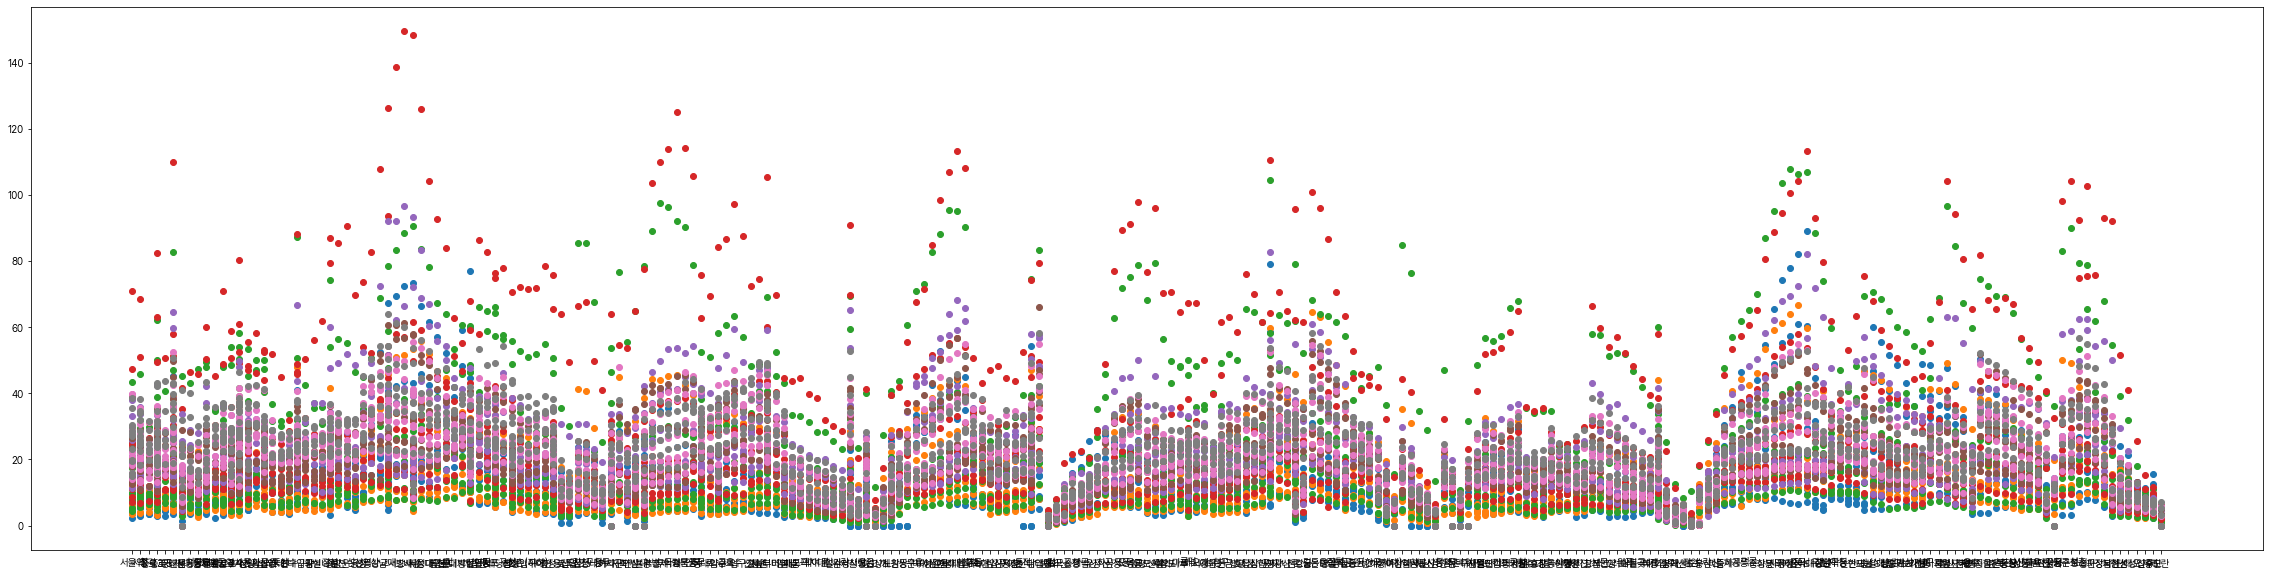

In [7]:
plt.figure(figsize=(40, 10))
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['5시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['6시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['7시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['8시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['9시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['10시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['11시30분'])
plt.scatter(seoul_metro_hard['역명'], seoul_metro_hard['12시30분'])
plt.legend
plt.show()

<AxesSubplot:xlabel='역명'>

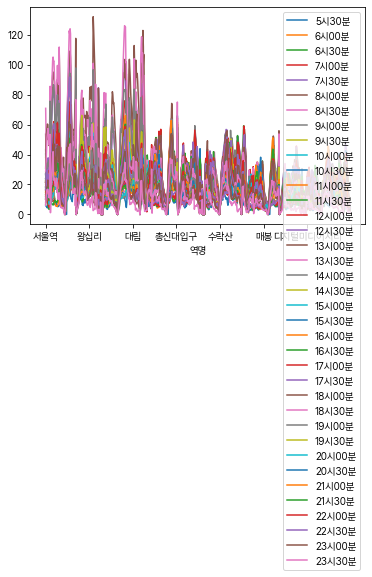

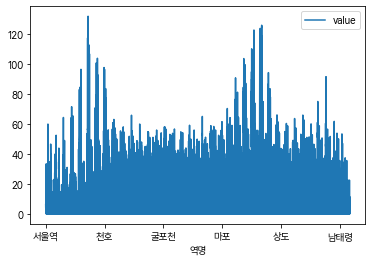

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# ax = fig.add_subplot(projection='3d')

seoul_metro_up_melt.plot(x='역명')
seoul_metro_up_melt2.plot(x='역명')

# ax.plot_surface(seoul_metro_up_melt2['혼잡도'], seoul_metro_up_melt2['시각'],seoul_metro_up_melt2)

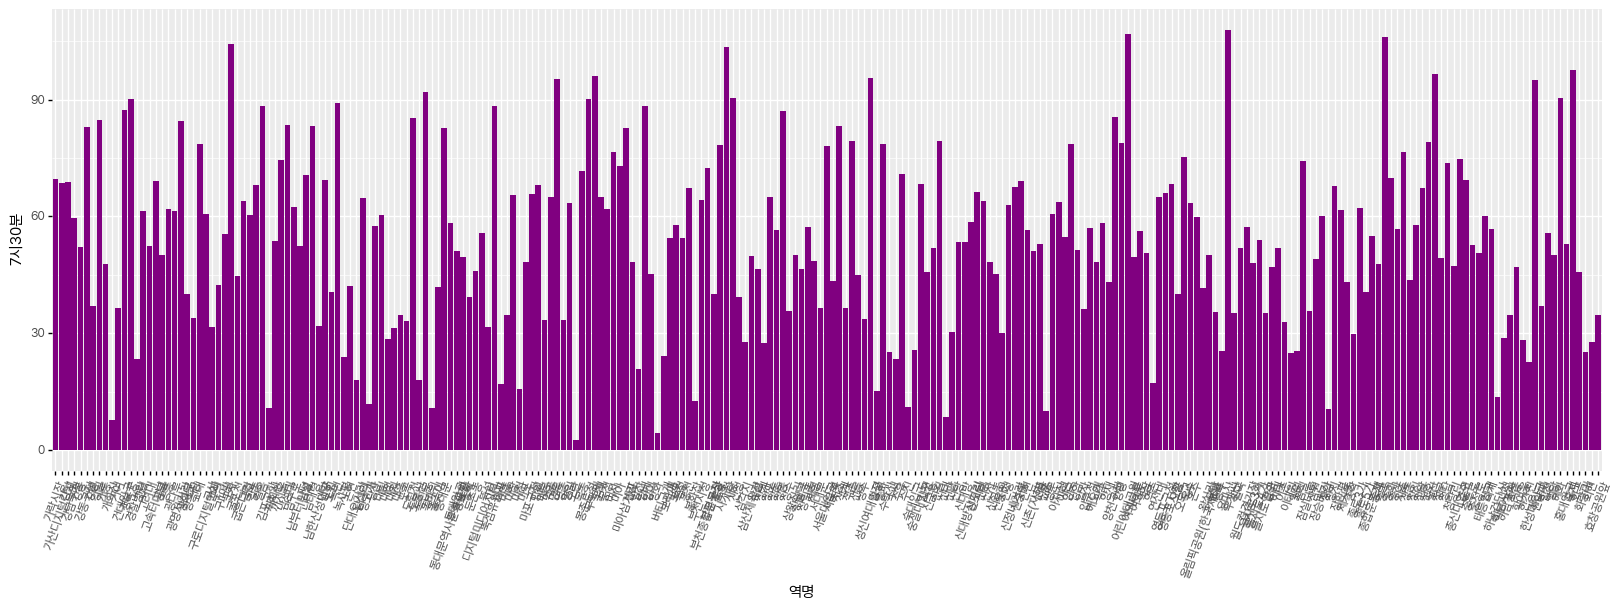

<ggplot: (99190119649)>

In [9]:
(
    ggplot(seoul_metro_hard, aes(x='역명', y='7시30분'))
        + geom_bar(stat='identity', position='dodge', fill='purple')
        
        + theme(text=element_text(family='Pretendard'), figure_size=(20, 6), axis_text_x=element_text(rotation=70))
)

In [10]:
seoul_metro_hard.columns

Index(['조사일자', '호선', '역번호', '역명', '구분', '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분',
       '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분',
       '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분',
       '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분',
       '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'],
      dtype='object')

In [11]:
z = seoul_metro_up_melt[y]
# z.to_csv('./output/seoul_metro_up_melt.csv')
z

NameError: name 'y' is not defined

In [ ]:
z = pd.read_csv('./output/seoul_metro_up_melt.csv',encoding='cp949')

x = z['역명']
y = z[['5시30분', '6시00분', '6시30분', '7시00분','7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분','11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분','14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분','18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분','21시30분', '22시00분', '22시30분', '23시00분', '23시30분']]

In [ ]:
# z.set_index('역명', inplace=True)
z

,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
역명,,,,,,,,,,,,,,,,,,,,,
서울역,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0,26.6,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
시청,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8,20.2,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
종각,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2,17.0,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
종로3가,4.8,9.8,9.0,12.9,20.4,30.8,25.5,18.9,23.6,19.7,...,29.6,22.2,21.0,18.9,26.1,18.3,22.8,29.0,18.2,16.6
종로5가,4.3,7.9,7.4,9.9,15.6,22.2,16.7,16.5,15.8,18.7,...,34.3,22.8,21.5,21.9,27.8,22.4,20.8,29.8,18.7,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
남한산성입구,7.5,4.3,5.2,7.3,6.5,10.3,11.0,13.4,13.2,13.6,...,6.1,5.2,5.3,4.1,3.8,3.2,4.1,1.9,2.3,1.1
단대오거리,5.2,2.9,4.3,4.8,4.4,6.5,7.2,9.0,9.1,9.2,...,5.8,5.3,4.6,4.8,4.5,3.5,4.2,3.2,2.7,1.3
신흥,3.0,2.1,3.6,3.1,2.7,3.7,4.4,5.3,6.1,5.3,...,4.9,4.3,4.4,4.6,5.1,3.8,4.1,3.7,3.0,1.4
